<a href="https://colab.research.google.com/github/CAUKimJisu/Deep.Learn4AI_CAU/blob/main/FinalProject/AI%EB%94%A5%EB%9F%AC%EB%8B%9D_EDA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#라이브러리 및 패키지 불러오기

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import string
from collections import Counter
from wordcloud import WordCloud
from wordcloud import STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


-

In [3]:
#train.csv와 test.csv 파일에서 데이터 불러오기 및 데이터 확인

df_train = pd.read_csv('train.csv')
print(df_train)

df_test = pd.read_csv('test.csv')
print(df_test)

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UT

In [4]:
#df_train, df_test 데이터셋의 행과 열 수 출력

print('train 데이터셋에는 {}개의 행과 {}개의 열이 있다.'.format(df_train.shape[0], df_train.shape[1]))
print('test 데이터셋에는 {}개의 행과 {}개의 열이 있다.'.format(df_test.shape[0], df_test.shape[1]))

train 데이터셋에는 7613개의 행과 5개의 열이 있다.
test 데이터셋에는 3263개의 행과 4개의 열이 있다.


In [5]:
print(df_train.info())

print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


In [6]:
print(df_train.head(5).to_string())
print(df_train.tail(5).to_string())

print(df_test.head(5).to_string())
print(df_test.tail(5).to_string())

   id keyword location                                                                                                                                   text  target
0   1     NaN      NaN                                                                  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all       1
1   4     NaN      NaN                                                                                                 Forest fire near La Ronge Sask. Canada       1
2   5     NaN      NaN  All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected       1
3   6     NaN      NaN                                                                      13,000 people receive #wildfires evacuation orders in California        1
4   7     NaN      NaN                                               Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school        1
    

-

In [14]:
#각 클래스별 예제 수 추출

Not_len = df_train[df_train['target'] == 0].shape[0]
print(Not_len)

Real_len = df_train[df_train['target'] == 1].shape[0]
print(Real_len)

3271
4342


<Axes: title={'center': 'Target Distribution'}, xlabel='target', ylabel='count'>

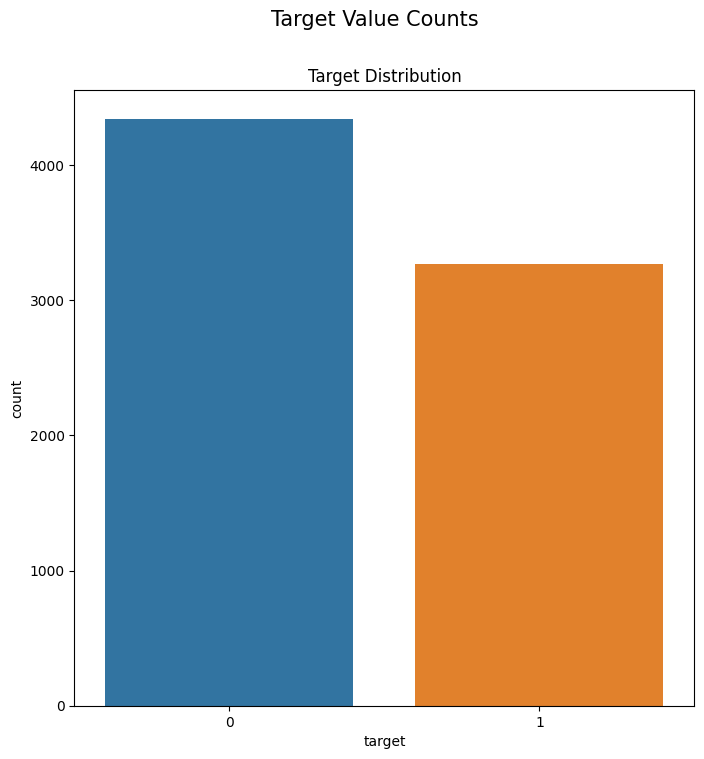

In [19]:
#3개 클래스의 예제 수를 막대 그래프로 그리기

plt.figure(figsize=(8,8))

plt.title('Target Distribution')
plt.suptitle("Target Value Counts", fontsize=15)

sns.countplot(x='target', data=df_train)

-

In [7]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
df_test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [9]:
#결측치 확인

print("Number of missing values in 'keyword' column in training set:", df_train['keyword'].isnull().sum())
print("Number of missing values in 'location' column in training set:", df_train['location'].isnull().sum())
print("Number of missing values in 'keyword' column in test set:", df_test['keyword'].isnull().sum())
print("Number of missing values in 'location' column in test set:", df_test['location'].isnull().sum())

Number of missing values in 'keyword' column in training set: 61
Number of missing values in 'location' column in training set: 2533
Number of missing values in 'keyword' column in test set: 26
Number of missing values in 'location' column in test set: 1105


<Axes: >

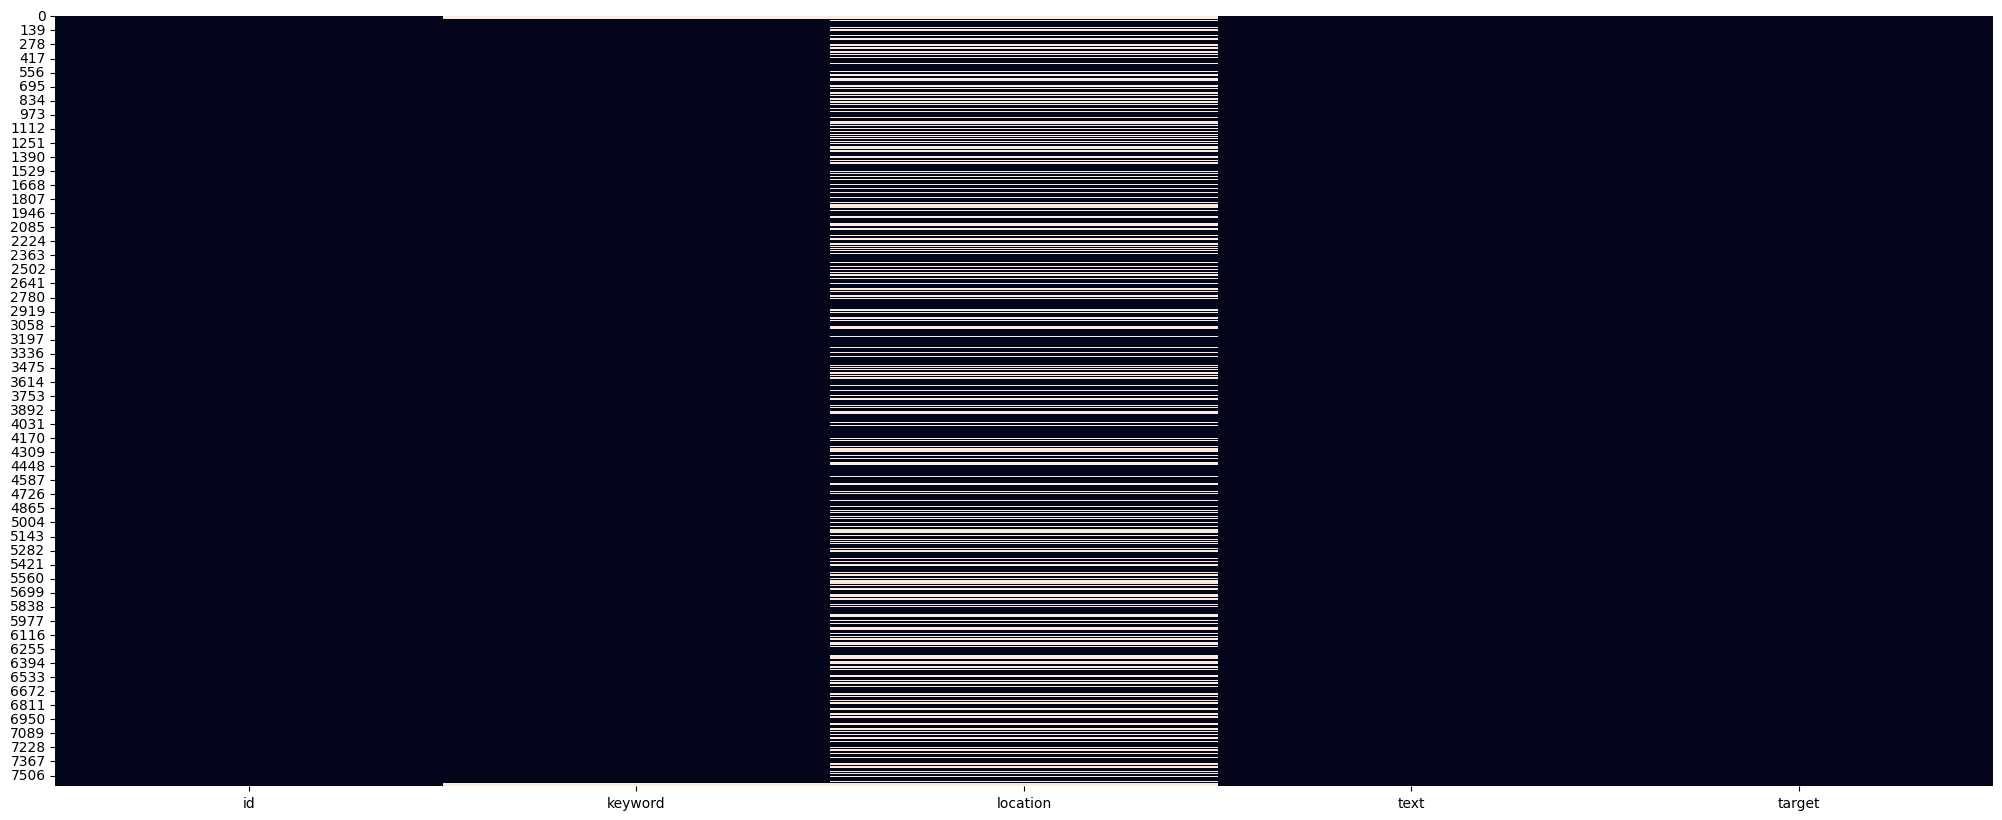

In [10]:
#결측치 히트맵

plt.figure(figsize=(25,10))
sns.heatmap(~df_train.isnull(), cbar=False, cmap=sns.cm.rocket_r)

<Axes: >

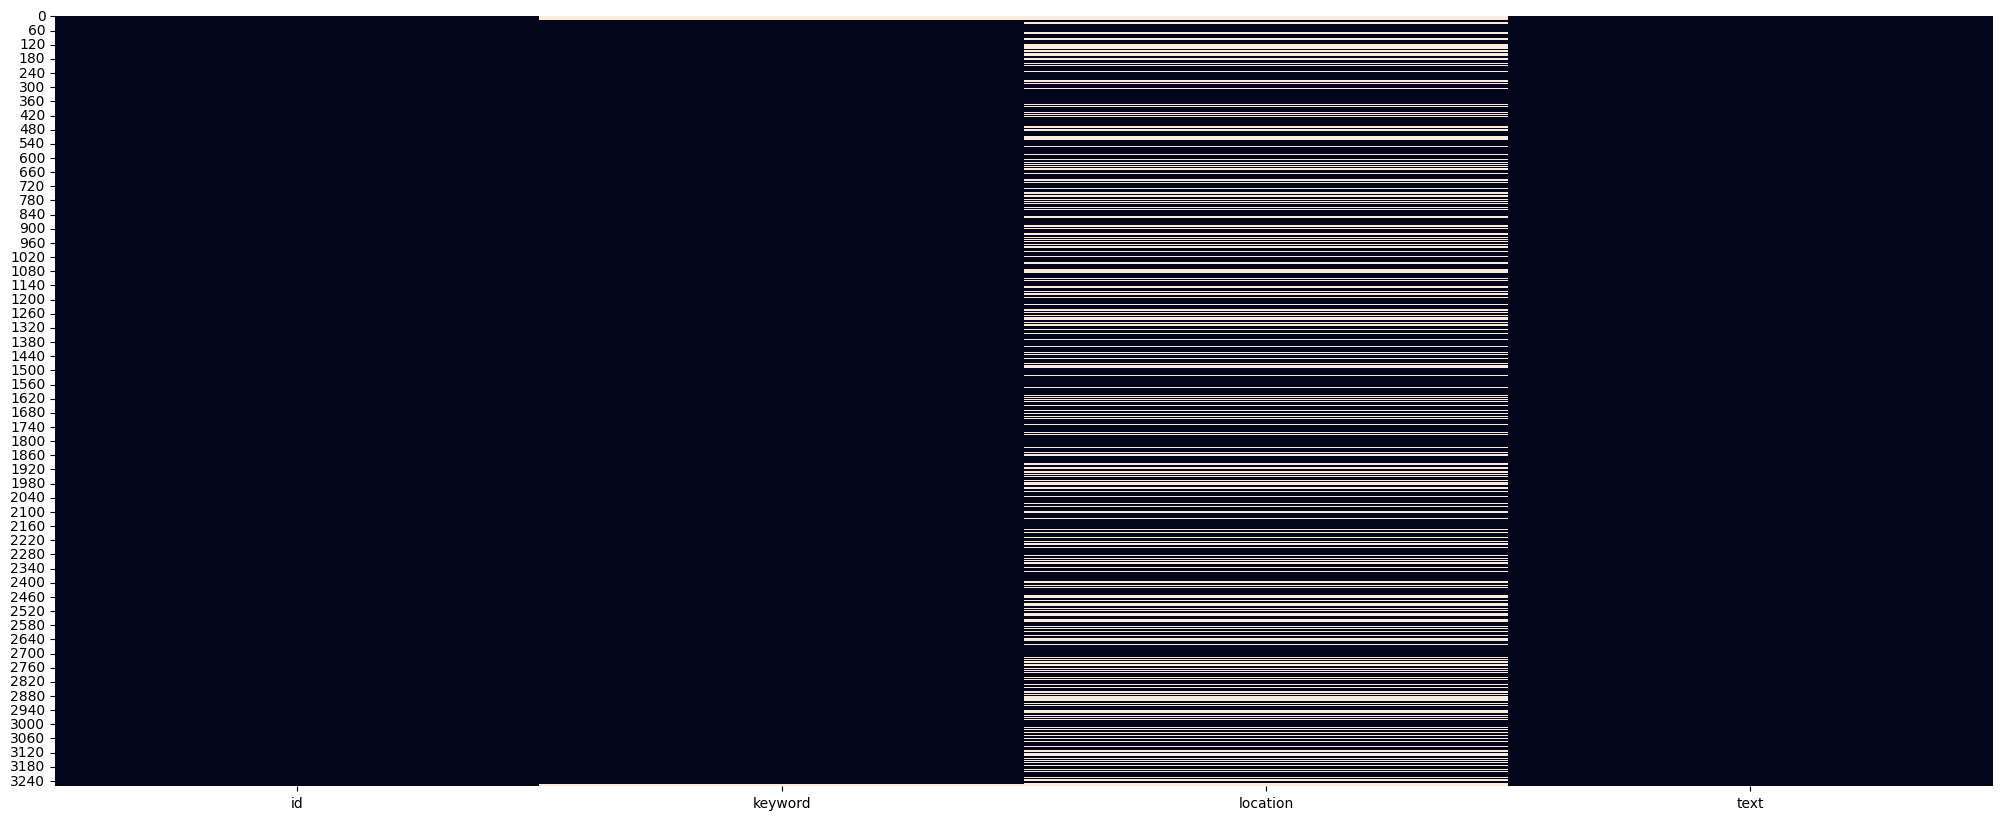

In [11]:
#결측치 히트맵

plt.figure(figsize=(25,10))
sns.heatmap(~df_test.isnull(), cbar=False, cmap=sns.cm.rocket_r)

-

In [ ]:
#트윗 텍스트의 길이를 계산하는 함수 정의

def length(text):
    '''a function which returns the length of text'''
    return len(text)

In [ ]:
#트윗 데이터에 길이 열 추가
df_train['length'] = df_train['text'].apply(length)

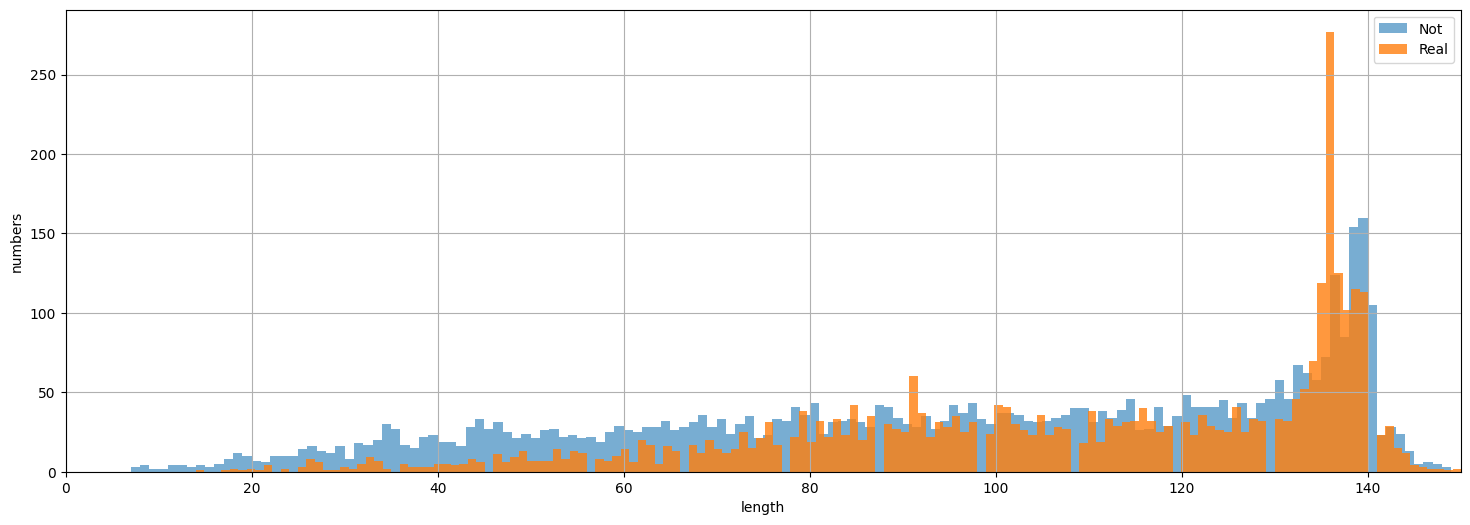

In [ ]:
#클래스별 텍스트 길이 히스토그램 그리기

plt.rcParams['figure.figsize'] = (18.0, 6.0)

bins = 150

plt.hist(df_train[df_train['target'] == 0]['length'], alpha=0.6, bins=bins, label='Not')
plt.hist(df_train[df_train['target'] == 1]['length'], alpha=0.8, bins=bins, label='Real')

plt.xlabel('length')
plt.ylabel('numbers')

plt.legend(loc='upper right')

plt.xlim(0, 150)

plt.grid()

plt.show()

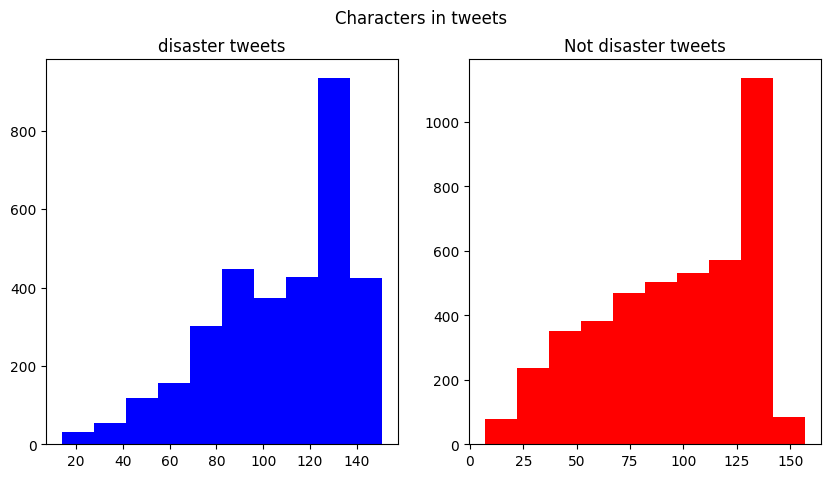

In [ ]:
#클래스별 트윗의 문자 수 히스토그램 그리기

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

tweet_len = df_train[df_train['target'] == 1]['text'].str.len()
ax1.hist(tweet_len, color='blue')
ax1.set_title('disaster tweets')

tweet_len = df_train[df_train['target'] == 0]['text'].str.len()
ax2.hist(tweet_len, color='red')
ax2.set_title('Not disaster tweets')

fig.suptitle('Characters in tweets')

plt.show()

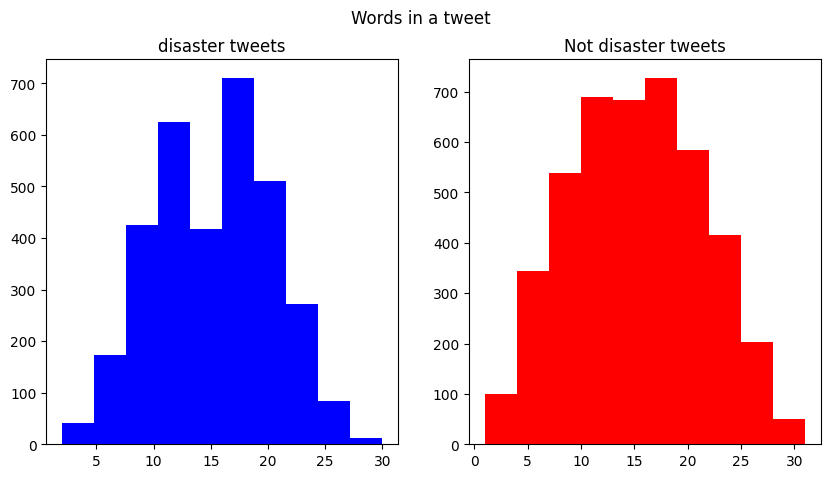

In [ ]:
#클래스별 트윗의 단어 수 히스토그램 그리기

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

tweet_len = df_train[df_train['target'] == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='blue')
ax1.set_title('disaster tweets')

tweet_len = df_train[df_train['target'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len, color='red')
ax2.set_title('Not disaster tweets')

fig.suptitle('Words in a tweet')

plt.show()

<ipython-input-24-165339afbff2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, color='blue')
<ipython-input-24-165339afbff2>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)), ax=ax2, color='red')


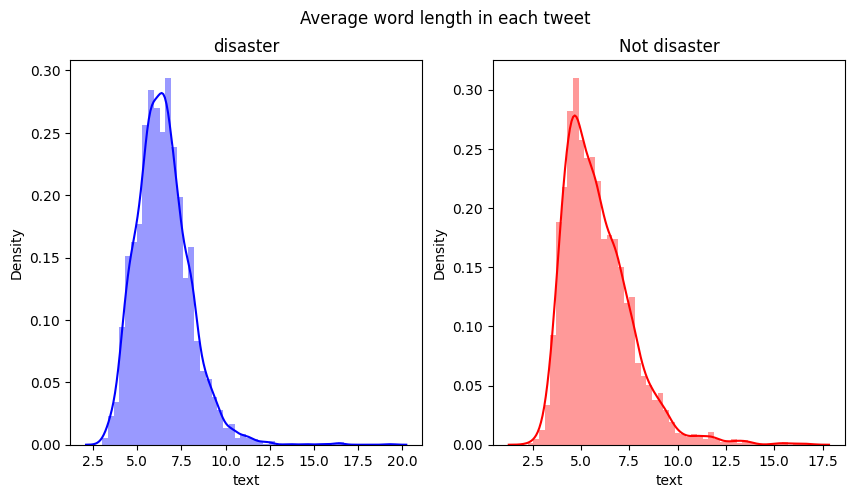

In [ ]:
#클래스별 트윗의 평균 단어 길이를 그래프로 그리기

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

word = df_train[df_train['target'] == 1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, color='blue')
ax1.set_title('disaster')

word = df_train[df_train['target'] == 0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax2, color='red')
ax2.set_title('Not disaster')

fig.suptitle('Average word length in each tweet')

plt.show()

-

In [ ]:
#불용어(stopwords) 리스트를 생성

stop = stopwords.words('english')

<BarContainer object of 10 artists>

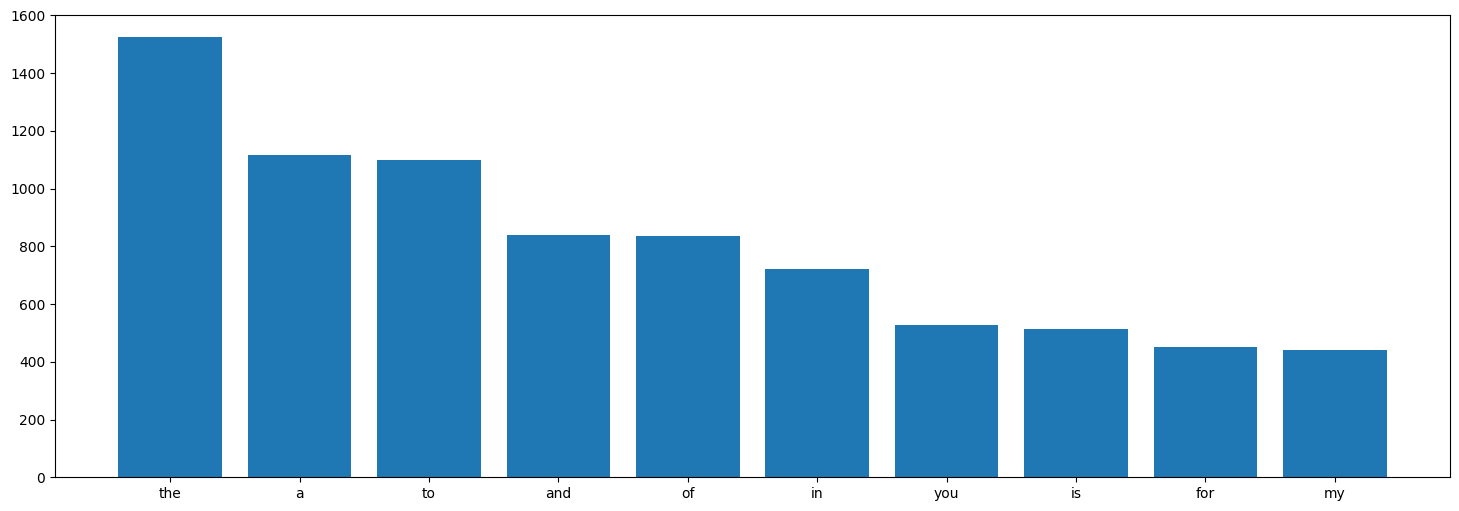

In [ ]:
#비재해 트윗에서 가장 자주 등장하는 불용어 상위 10개 막대 그래프

def create_corpus(target):
    corpus=[]

    for x in df_train[df_train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

x,y=zip(*top)

plt.bar(x,y)

<BarContainer object of 10 artists>

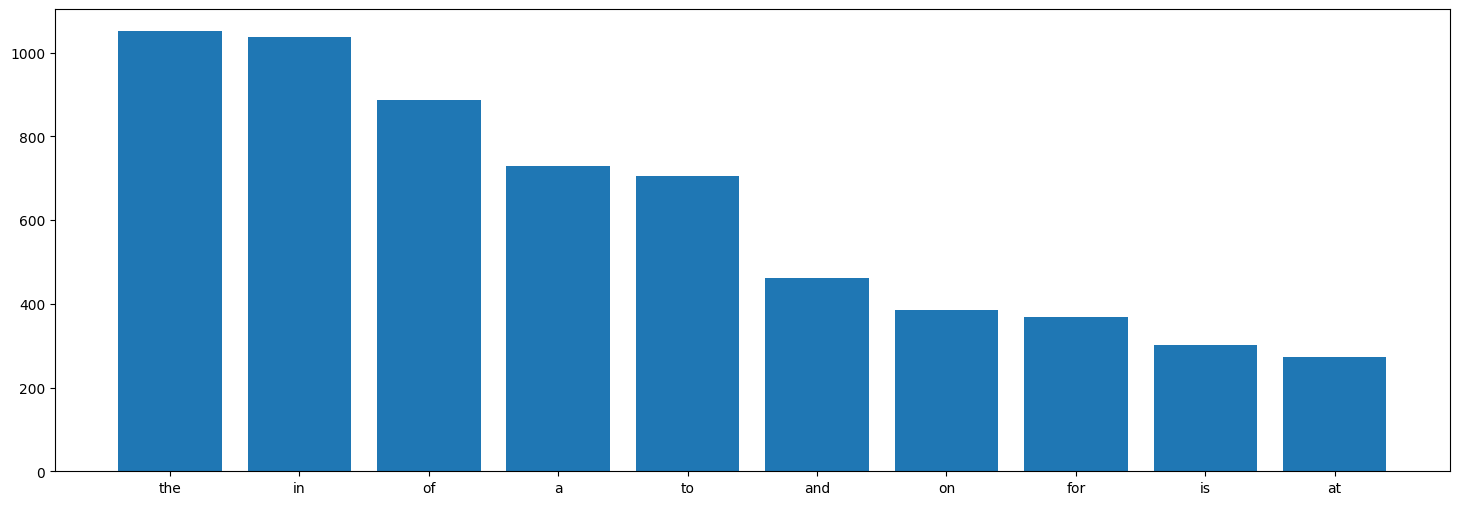

In [ ]:
#재해 트윗에서 가장 자주 등장하는 불용어 상위 10개 막대 그래프

corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

x,y=zip(*top)

plt.bar(x,y)

<BarContainer object of 18 artists>

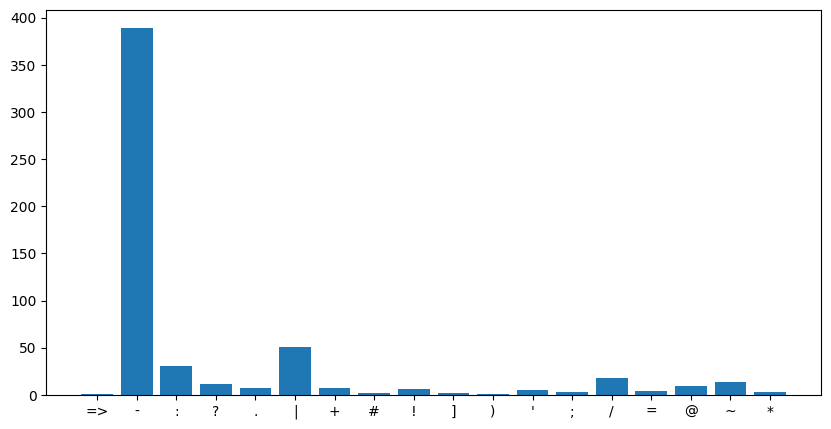

In [ ]:
#특수문자의 등장 빈도 막대 그래프

plt.figure(figsize=(10,5))

corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

plt.bar(x,y)

<BarContainer object of 20 artists>

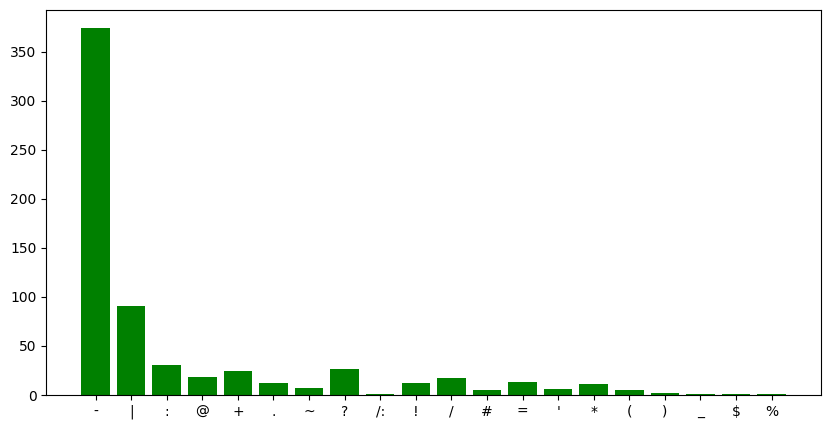

In [ ]:
#특수문자의 등장 빈도 막대 그래프

plt.figure(figsize=(10,5))

corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

plt.bar(x,y,color='green')

-

In [ ]:
#'keyword', 'ㅣocation' 열의 고유 값 개수 출력

print(f'Number of unique values in keyword = {df_train["keyword"].nunique()} (Training) - {df_test["keyword"].nunique()} (Test)')
print(f'Number of unique values in location = {df_train["location"].nunique()} (Training) - {df_test["location"].nunique()} (Test)')

Number of unique values in keyword = 221 (Training) - 221 (Test)
Number of unique values in location = 3341 (Training) - 1602 (Test)


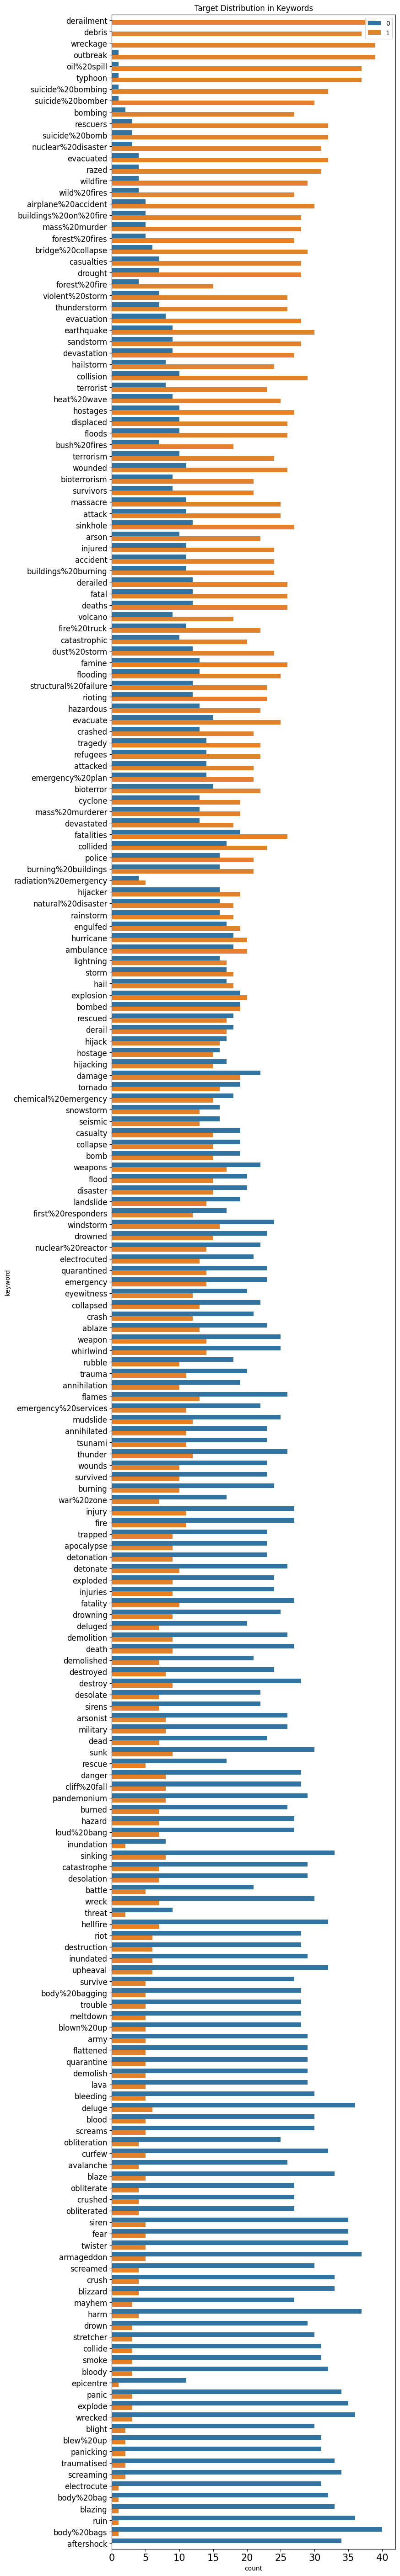

In [ ]:
#'keyword' 열의 평균 'target' 값을 기준으로 키워드의 타겟 분포 그래프를 그리기

df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=df_train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df_train.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

df_train.drop(columns=['target_mean'], inplace=True)

-

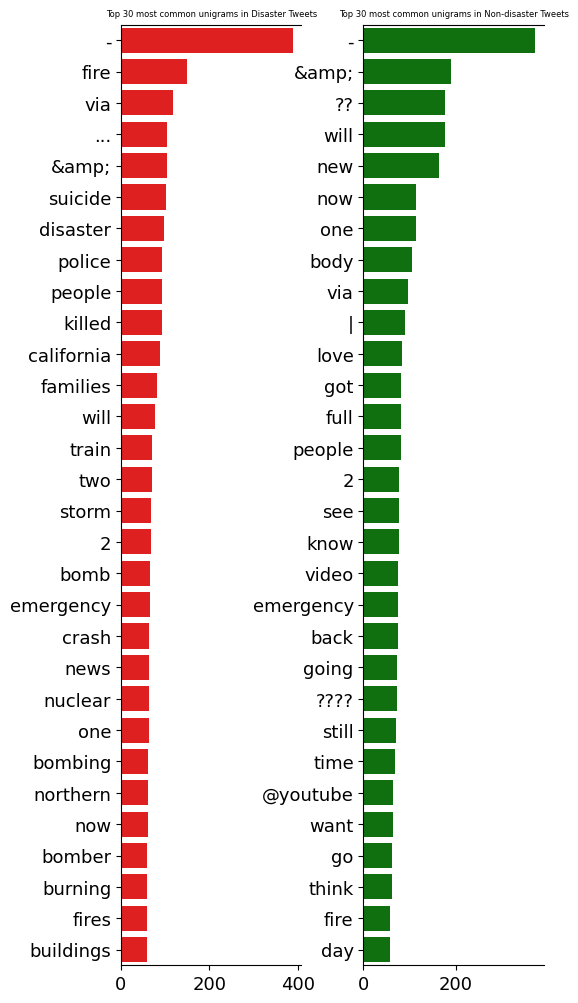

In [ ]:
#가장 빈도가 높은 단어 상위 30개 막대 그래프

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 30

disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

DISASTER_TWEETS = df_train['target'] == 1

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1

for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1

df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=2, figsize=(5, 10), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=6)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=6)

plt.show()

Text(0.5, 1.0, 'Top 30 most common bigrams in Non-disaster Tweets')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 137 (\x89) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


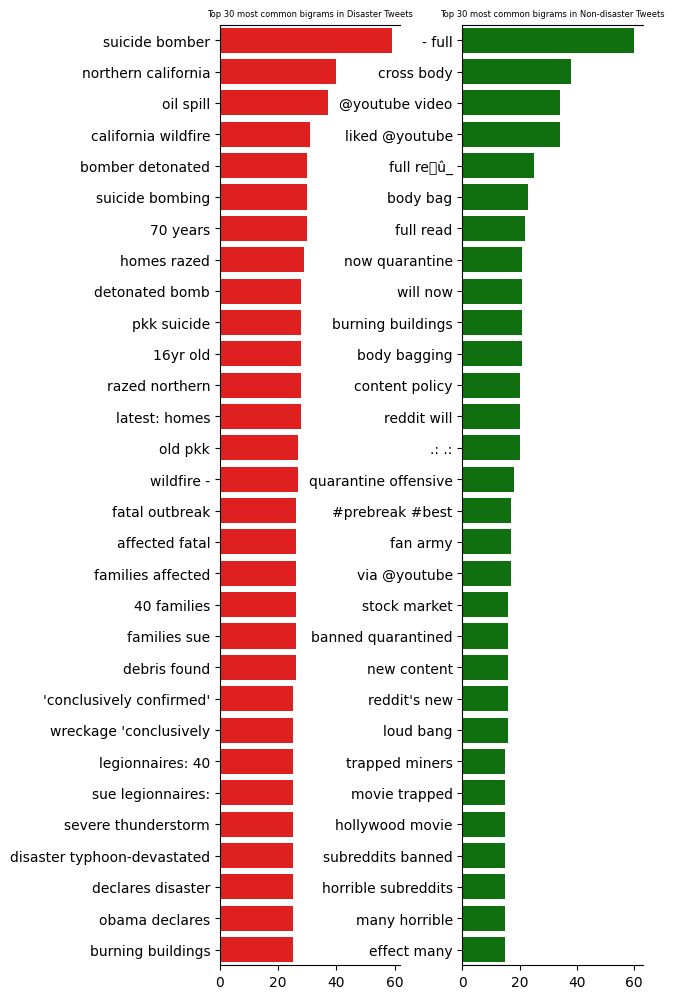

In [ ]:
#가장 많이 등장하는 바이그램 단어 상위 30개 막대 그래프

disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1

for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1

df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=2, figsize=(5, 10), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=6)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=6)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


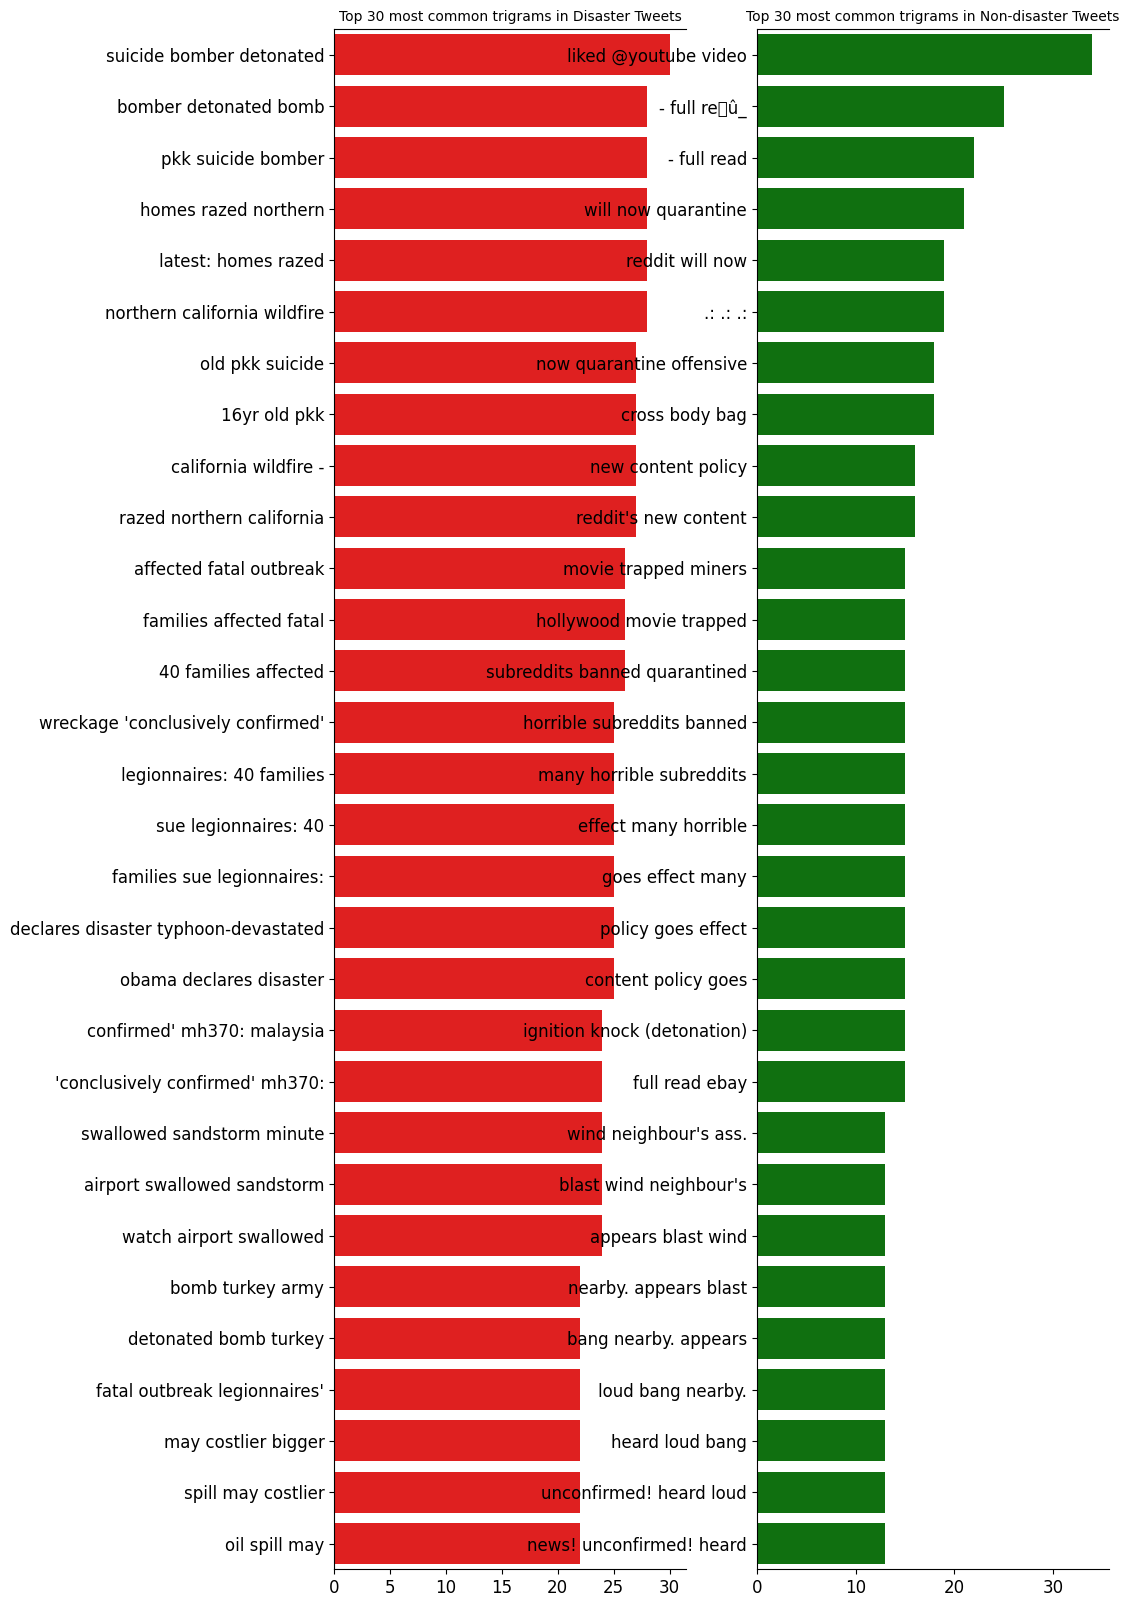

In [ ]:
#가장 많이 등장하는 트리그램 단어 상위 30개 막대 그래프

disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        disaster_trigrams[word] += 1

for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1

df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=2, figsize=(10, 20), dpi=100)

sns.barplot(y=df_disaster_trigrams[0].values[:N], x=df_disaster_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_trigrams[0].values[:N], x=df_nondisaster_trigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

axes[0].set_title(f'Top {N} most common trigrams in Disaster Tweets', fontsize=10)
axes[1].set_title(f'Top {N} most common trigrams in Non-disaster Tweets', fontsize=10)

plt.show()

-

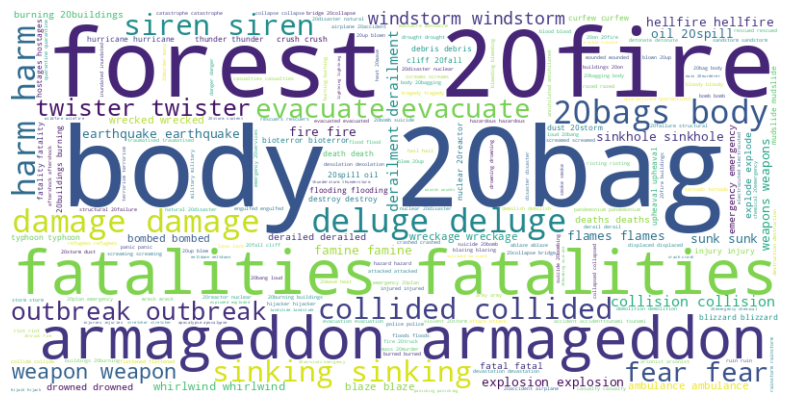

In [26]:
#'keyword'열 단어 워드클라우드 시각화

data = pd.read_csv('train.csv')

data['keyword'].fillna('', inplace=True)

keywords = ' '.join(data['keyword'])

try:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
except TypeError as e:
    print("Error: ", e)